# 1. 단어 빈도와 TF-IDF 분석하기

In [4]:
from teanaps.nlp import SyntaxAnalyzer

sa = SyntaxAnalyzer()

## 연구문제1-2)민원데이터-아이모드 시행(2019.12.01~2022.12.31)

In [9]:
# TEANAPS 라이브러리를 불러옵니다.

from teanaps.nlp import MorphologicalAnalyzer
from teanaps.nlp import Processing

In [10]:
# 키워드 빈도 확인

processing = Processing()
ma = MorphologicalAnalyzer()
ma.set_tagger("okt") # Okt 형태소 분석기 사용(한국어 텍스트 분석)

tokenized_sentence_list = []
PATH = "연구문제1-2.txt"
POS_LIST = ["NNG", "NNP"]

f = open(PATH, encoding="utf-8")
tokenized_sentence_list = []
line_count = 0
sample_dict = {}

for line in f:
    line_count += 1
    print(line_count, end = '\r')
    line = line.strip()
    col = line.split('\t')
    word_list = ma.parse(line)
    for word, pos, loc in word_list:
        if word != "" and pos in ["NNG", "NNP"]:
            if word in sample_dict.keys():
                sample_dict[word] += 1
            else:
                sample_dict[word] = 1

f.close()

sample_list = []

for word, count in sample_dict.items():
    sample_list.append([word, count])

sample_list.sort(key=lambda elem: elem[1], reverse=True)

for word, count in sample_list[:50]:
    print(word + "\t" + str(count))

인천	700
수	622
것	565
등	422
및	416
행정	401
안전	392
지역	363
자치	324
제안	321
%	320
시	274
이용	261
설치	236
버스	211
도로	198
이	198
현재	196
생각	179
개선	178
위	178
주민	171
방안	158
사용	153
운영	149
곳	149
경우	144
사람	140
시민	138
효과	135
제	133
시간	131
공원	130
카드	129
그	128
함	127
시장	127
활용	127
관리	126
활성화	126
쓰레기	126
시설	125
민원	119
대한	116
문제	113
또한	112
더	109
차량	106
주차	105
교통	103


In [11]:
f = open(PATH, encoding="utf-8")
line = f.readline()
col = line.split("\t")
print("Number of columns: ", len(col))
f.close()

Number of columns:  5


In [12]:
# 데이터 개수
line_count

4374

In [13]:
tokenized_sentence_list = []
PATH = "연구문제1-2.txt"
POS_LIST = ["NNG", "NNP"]

count_all=[]

f = open(PATH, encoding="utf-8")

# 파일에서 기사본문만 추출하여 명사형 문장을 생성합니다.
for line in f:
    line = line.strip()
    col = line.split("\t") # [label, souce, datetime, title, content]
    
     # 컬럼 수가 5개 미만이면, 해당 줄을 무시합니다.
    if len(col)<5 :
        continue
        
    post = col[0]
    title = col[1]         # 민원 제목
    category = col[2]        # 분류
    datetime = col[3]      # 작성일자
    content = " ".join(col[4:]) # 본문

    tagged_word_list = ma.parse(content)
    count_all.append(tagged_word_list)
    #sa_result = sa.parse(tagged_word_list, [])
    tokenized_sentence = processing.get_plain_text(tagged_word_list, pos_list=POS_LIST, tag=False)
    tokenized_sentence_list.append(tokenized_sentence)

f.close()

tokenized_sentence_list[:10]

['다세대 주택 빌라 아파트 처럼 관리 사무소 장기 수선 충당금 명목 건물 보수 및 수선 시설 점검 뿐 각종 불편 사항 존재 공동체 주민 간 마찰 민주 시민 의식 저해',
 '코로나 발생 이후 정부 버스 철도 등 운전 시설 도착 후 운행 종류 후 방역 실시',
 '중구청 야심 신포시 옆 신포 청년 운영 골목 식당 방송 상권 잠깐',
 '가로수 국 유지 나무 자연재해 벌채 폐기 목재 사용 개인 의사 폐기물 판매 수 폐기 목재 중 부분 개인 구매 제도',
 '남동구 논현동 김미현 골프장 이안 파 하우스 에코 중앙 로 구간 도로 조성 당시 발생 약 길이 절개 사면',
 '인천 시민 음 카드 란 지역화폐 중장 년층 어플 사용 혜택 제외 긴급 재난 원금 음 카드 도 제공 어플 용법 분 원금 뒤 카드 막대 자원 낭비 긴급 재난 원금 지역화폐 용법 안내 봉사활동 기획 명당 시간 공식 봉사 시간 인정 중장 년층 이용 시장 경로당 근처 배치 효과 것 주민 센터 등 민원 담당 공무원 단순 안내 반복 업무 더욱 민원 상담 시간 할애 수 봉사 시간 실적 청소년 층 봉사자 활동 청소년 노년 층 교류 것',
 '재난 문자',
 '얼마 전 신문 인천 하천인 승기천 대한 기사',
 '현 송도 국제 캠핑장 이전 호빗 유료 캠핑장 은 취사 및 야영 금지 피크닉 장소 운영',
 '국제 업무 단지 방면 이용 객 거의 수상 레 포츠 이용 확대 수영 바']

In [14]:
# 전체 토큰개수 확인
all_count = 0
for i in range(0, len(count_all)):
    all_count += len(count_all[i])
print(all_count)

15977


In [15]:
# 명사 토큰개수 확인
noun_count = 0
for i in range(0, len(tokenized_sentence_list)):
    noun_count += len(tokenized_sentence_list[i].split(' '))
print(noun_count)

7845


In [16]:
from teanaps.text_analysis import TfidfCalculator

tfidf = TfidfCalculator()

In [17]:
# TF/TF-IDF 값을 계산합니다.
tfidf.calculation_tfidf(tokenized_sentence_list, tfidf_count=100, tfidf_state=True)

In [18]:
# 단어 x TF 매트릭스를 생성합니다.
tfidf.get_tf_matrix()

가격  가구  가까이  가끔  가능  가능성  가량  가로등  가로수  가로수길  가막  가맹  가방  가보  가운데  가일  \
0     0   0    0   0   0    0   0    0    0     0   0   0   0   0    0   0   
1     0   0    0   0   0    0   0    0    0     0   0   0   0   0    0   0   
2     0   0    0   0   0    0   0    0    0     0   0   0   0   0    0   0   
3     0   0    0   0   0    0   0    0    1     0   0   0   0   0    0   0   
4     0   0    0   0   0    0   0    0    0     0   0   0   0   0    0   0   
..   ..  ..  ...  ..  ..  ...  ..  ...  ...   ...  ..  ..  ..  ..  ...  ..   
308   0   0    0   0   0    0   0    0    0     0   0   0   0   0    0   0   
309   0   0    0   0   0    0   0    0    0     0   0   0   0   0    0   0   
310   0   0    0   0   0    0   0    0    0     0   0   0   0   0    0   0   
311   0   0    0   0   0    0   0    0    0     0   0   0   0   0    0   0   
312   0   0    0   0   0    0   0    0    0     0   0   0   0   1    0   0   

     가장  가장자리  가정  가정동  가정역  가족  가지  가치  가판  가해자  각  각기  각자  각종  각지  각층  간  \
0     0     0   0    0    0   0   0   0   0    0  0   0   0   1   0   0  1   
1     0     0   0    0    0   0   0   0   0    0  0   0   0   0   0   0  0   
2     0     0   0    0    0   0   0   0   0    0  0   0   0   0   0   0  0   
3     0     0   0    0    0   0   0   0   0    0  0   0   0   0   0   0  0   
4     0     0   0    0    0   0   0   0   0    0  0   0   0   0   0   0  0   
..   ..   ...  ..  ...  ...  ..  ..  ..  ..  ... ..  ..  ..  ..  ..  .. ..   
308   0     0   0    0    0   0   0   0   0    0  0   0   0   0   0   0  0   
309   0     0   0    0    0   0   0   0   0    0  0   0   0   0   0   0  0   
310   0     0   0    0    0   0   0   0   0    0  0   0   0   0   0   0  0   
311   0     0   0    0    0   0   0   0   0    0  0   0   0   0   0   0  0   
312   0     0   0    0    0   0   0   0   0    0  0   0   0   0   0   0  0   

     간격  간직  갈등  감  감사  감사원  감소  감염  감염증  감자  갑곳  갑자기  값  갓길  강남  강사  강습  강원도  \
0     0   0   0  0   0    0   0   0    0   0   0    0  0   0   0   0   0    0   
1     0   0   0  0   0    0   0   0    0   0   0    0  0   0   0   0   0    0   
2     0   0   0  0   0    0   0   0    0   0   0    0  0   0   0   0   0    0   
3     0   0   0  0   0    0   0   0    0   0   0    0  0   0   0   0   0    0   
4     0   0   0  0   0    0   0   0    0   0   0    0  0   0   0   0   0    0   
..   ..  ..  .. ..  ..  ...  ..  ..  ...  ..  ..  ... ..  ..  ..  ..  ..  ...   
308   0   0   0  0   0    0   0   0    0   0   0    0  0   0   0   0   0    0   
309   0   0   0  0   0    0   0   0    0   0   0    0  0   0   0   0   0    0   
310   0   0   0  0   0    0   0   0    0   0   0    0  0   0   0   0   0    0   
311   0   0   0  0   0    0   0   0    0   0   0    0  0   0   0   0   0    0   
312   0   0   0  0   0    0   0   0    0   0   0    0  0   0   0   0   0    0   

     강의  강조  강좌  강화  강화군  강화도  갖  개  개념  개동  개발  개선  개설  개성  개요  개월  개인  개정  \
0     0   0   0   0    0    0  0  0   0   0   0   0   0   0   0   0   0   0   
1     0   0   0   0    0    0  0  0   0   0   0   0   0   0   0   0   0   0   
2     0   0   0   0    0    0  0  0   0   0   0   0   0   0   0   0   0   0   
3     0   0   0   0    0    0  0  0   0   0   0   0   0   0   0   0   2   0   
4     0   0   0   0    0    0  0  0   0   0   0   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ...  ... .. ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
308   0   0   0   3    0    0  0  0   0   0   0   0   0   0   0   0   0   0   
309   0   0   0   0    0    0  0  0   0   0   0   0   0   0   0   0   0   0   
310   0   0   0   0    0    0  0  0   0   0   0   0   0   0   0   0   0   0   
311   0   0   0   0    0    0  0  0   0   0   0   0   0   0   0   0   0   0   
312   0   0   0   0    0    0  0  0   0   0   0   0   0   0   0   0   1   0   

     개최  개통  개편  객  갯골  갯벌  거  거기  거나  거동  거리  거부  거의  거주  거처  걱정  건  건강  건너편  \
0     0   0   0  0   0   0  0   0   0   0   0   0   0   0   0   0  0   0    0   
1     0   0   0  0   0   0  0   0   0   0   0  

In [19]:
# 단어 x TF-IDF 매트릭스를 생성합니다.
tfidf.get_tfidf_matrix()

가격   가구  가까이   가끔   가능  가능성   가량  가로등       가로수  가로수길   가막   가맹   가방  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.204666   0.0  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...       ...   ...  ...  ...  ...   
308  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0   
309  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0   
310  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0   
311  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0   
312  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0   

           가보  가운데   가일   가장  가장자리   가정  가정동  가정역   가족   가지   가치   가판  가해자  \
0    0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1    0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2    0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3    0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4    0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..        ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
308  0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
309  0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
310  0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
311  0.000000  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
312  0.421887  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       각   각기   각자        각종   각지   각층         간   간격   간직   갈등    감   감사  \
0    0.0  0.0  0.0  0.163431  0.0  0.0  0.186281  0.0  0.0  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
..   ...  ...  ...       ...  ...  ...       ...  ...  ...  ...  ...  ...   
308  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
309  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
310  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
311  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
312  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   

     감사원   감소   감염  감염증   감자   갑곳  갑자기    값   갓길   강남   강사   강습  강원도   강의  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
308  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
309  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
310  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
311  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
312  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      강조   강좌        강화  강화군  강화도    갖    개   개념   개동   개발   개선   개설   개성  \
0    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0

In [20]:
# TF 계산결과를 딕셔너리 형태로 불러옵니다.
tfidf.get_tf_dict()

{'다세대': 1,
 '주택': 6,
 '빌라': 3,
 '아파트': 14,
 '처럼': 1,
 '관리': 18,
 '사무소': 2,
 '장기': 6,
 '수선': 2,
 '충당금': 1,
 '명목': 1,
 '건물': 7,
 '보수': 1,
 '시설': 23,
 '점검': 2,
 '뿐': 1,
 '각종': 7,
 '불편': 9,
 '사항': 6,
 '존재': 5,
 '공동체': 6,
 '간': 2,
 '마찰': 1,
 '민주': 1,
 '의식': 2,
 '저해': 1,
 '코로나': 32,
 '발생': 17,
 '이후': 2,
 '정부': 2,
 '버스': 35,
 '철도': 2,
 '운전': 3,
 '도착': 7,
 '운행': 10,
 '종류': 2,
 '방역': 3,
 '실시': 8,
 '중구청': 2,
 '야심': 1,
 '신포시': 1,
 '옆': 3,
 '신포': 1,
 '청년': 1,
 '운영': 25,
 '골목': 3,
 '식당': 3,
 '방송': 5,
 '상권': 2,
 '잠깐': 1,
 '가로수': 3,
 '국': 1,
 '유지': 3,
 '나무': 12,
 '자연재해': 1,
 '벌채': 1,
 '폐기': 4,
 '목재': 2,
 '개인': 12,
 '의사': 1,
 '폐기물': 1,
 '판매': 8,
 '부분': 10,
 '구매': 7,
 '제도': 3,
 '남동구': 6,
 '논현동': 2,
 '김미현': 1,
 '골프장': 1,
 '이안': 2,
 '파': 1,
 '하우스': 1,
 '에코': 5,
 '중앙': 5,
 '구간': 3,
 '도로': 33,
 '조성': 6,
 '당시': 2,
 '약': 6,
 '길이': 2,
 '절개': 1,
 '사면': 1,
 '카드': 38,
 '란': 1,
 '지역화폐': 3,
 '중장': 2,
 '년층': 2,
 '어플': 2,
 '혜택': 16,
 '제외': 2,
 '긴급': 8,
 '재난': 7,
 '원금': 7,
 '도': 10,
 '제공': 8,
 '용법': 2,
 '뒤': 4,
 '막대'

In [21]:
# TF 계산결과를 리스트 형태로 불러옵니다.
tfidf.get_tf_list()[:60]

[['설치', 40],
 ['카드', 38],
 ['버스', 35],
 ['도로', 33],
 ['코로나', 32],
 ['주차', 27],
 ['운영', 25],
 ['차량', 25],
 ['시설', 23],
 ['사회', 23],
 ['시간', 22],
 ['지원', 22],
 ['개선', 22],
 ['활성화', 21],
 ['거리', 21],
 ['장애인', 21],
 ['효과', 20],
 ['불법', 20],
 ['공원', 20],
 ['도서관', 20],
 ['시장', 19],
 ['통해', 19],
 ['관리', 18],
 ['발생', 17],
 ['층', 17],
 ['상태', 17],
 ['혜택', 16],
 ['장소', 16],
 ['정차', 16],
 ['배달', 16],
 ['상황', 16],
 ['사업', 16],
 ['가지', 16],
 ['교통', 15],
 ['경제', 15],
 ['서울', 15],
 ['더', 15],
 ['아파트', 14],
 ['송도', 14],
 ['이상', 14],
 ['개발', 14],
 ['국제', 13],
 ['인구', 13],
 ['주차장', 13],
 ['단체', 13],
 ['앱', 13],
 ['소비', 13],
 ['역', 13],
 ['활용', 13],
 ['인도', 13],
 ['홍보', 13],
 ['서비스', 13],
 ['저상버스', 13],
 ['나무', 12],
 ['개인', 12],
 ['자전거', 12],
 ['도시', 12],
 ['공사', 12],
 ['정보', 12],
 ['운동', 12]]

In [31]:
# TF 계산결과를 리스트 형태로 불러옵니다.
tfidf.get_tf_list()

[['설치', 40],
 ['카드', 38],
 ['버스', 35],
 ['도로', 33],
 ['코로나', 32],
 ['주차', 27],
 ['운영', 25],
 ['차량', 25],
 ['시설', 23],
 ['사회', 23],
 ['시간', 22],
 ['지원', 22],
 ['개선', 22],
 ['활성화', 21],
 ['거리', 21],
 ['장애인', 21],
 ['효과', 20],
 ['불법', 20],
 ['공원', 20],
 ['도서관', 20],
 ['시장', 19],
 ['통해', 19],
 ['관리', 18],
 ['발생', 17],
 ['층', 17],
 ['상태', 17],
 ['혜택', 16],
 ['장소', 16],
 ['정차', 16],
 ['배달', 16],
 ['상황', 16],
 ['사업', 16],
 ['가지', 16],
 ['교통', 15],
 ['경제', 15],
 ['서울', 15],
 ['더', 15],
 ['아파트', 14],
 ['송도', 14],
 ['이상', 14],
 ['개발', 14],
 ['국제', 13],
 ['인구', 13],
 ['주차장', 13],
 ['단체', 13],
 ['앱', 13],
 ['소비', 13],
 ['역', 13],
 ['활용', 13],
 ['인도', 13],
 ['홍보', 13],
 ['서비스', 13],
 ['저상버스', 13],
 ['나무', 12],
 ['개인', 12],
 ['자전거', 12],
 ['도시', 12],
 ['공사', 12],
 ['정보', 12],
 ['운동', 12],
 ['쓰레기', 12],
 ['안전', 12],
 ['정책', 12],
 ['통행료', 12],
 ['중구', 11],
 ['직접', 11],
 ['거주', 11],
 ['공항', 11],
 ['호선', 11],
 ['신도시', 11],
 ['관광', 11],
 ['의', 11],
 ['승차', 11],
 ['전통', 11],
 ['조례', 11],
 ['기업', 11],
 ['목

In [23]:
# TF-IDF 계산결과를 딕셔너리 형태로 불러옵니다.
tfidf.get_tfidf_dict()

{'설치': 3.541855835449441,
 '카드': 2.955752161718933,
 '버스': 2.819464895781446,
 '도로': 2.868873753655152,
 '코로나': 2.925903929275198,
 '주차': 2.8173610644699827,
 '운영': 2.5398011553978326,
 '차량': 3.48427934345416,
 '시설': 3.1617004036176044,
 '사회': 2.3493988293596324,
 '시간': 1.7704075598677989,
 '지원': 2.3218706265279225,
 '개선': 1.6803890553249023,
 '활성화': 2.235085087487097,
 '거리': 2.5843843636630988,
 '장애인': 0.9203448623668197,
 '효과': 1.2152213209929372,
 '불법': 2.264738596895596,
 '공원': 4.390297347676079,
 '도서관': 1.862448189383485,
 '시장': 1.9389008473184046,
 '통해': 1.2937844430278667,
 '관리': 1.8690634071151973,
 '발생': 1.6320407828862438,
 '층': 1.8997255709315566,
 '상태': 2.052963380902321,
 '혜택': 0.6805558411010918,
 '장소': 1.8060351994397548,
 '정차': 2.12094093336304,
 '배달': 1.3232509078507353,
 '상황': 1.2098166913889925,
 '사업': 1.0211872531551314,
 '가지': 1.1914007002927232,
 '교통': 2.1965740136780134,
 '경제': 1.3750802641987414,
 '서울': 2.6656336652742296,
 '더': 0.9128081603135838,
 '아파트': 2.092

In [32]:
# TF-IDF 계산결과를 리스트 형태로 불러옵니다.
tfidf.get_tfidf_list()

[['공원', 4.390297347676079],
 ['거주', 3.562982785098184],
 ['설치', 3.541855835449441],
 ['차량', 3.48427934345416],
 ['시설', 3.1617004036176044],
 ['카드', 2.955752161718933],
 ['코로나', 2.925903929275198],
 ['인구', 2.8904903023463024],
 ['도로', 2.868873753655152],
 ['버스', 2.819464895781446],
 ['주차', 2.8173610644699827],
 ['참조', 2.7071067811865475],
 ['서울', 2.6656336652742296],
 ['거리', 2.5843843636630988],
 ['운영', 2.5398011553978326],
 ['송도', 2.4800300816962912],
 ['첨부', 2.4200908875292937],
 ['사회', 2.3493988293596324],
 ['지원', 2.3218706265279225],
 ['불법', 2.264738596895596],
 ['활성화', 2.235085087487097],
 ['도시', 2.2275378915192836],
 ['신도시', 2.219783147124026],
 ['교통', 2.1965740136780134],
 ['부서', 2.1791393954230207],
 ['정차', 2.12094093336304],
 ['아파트', 2.092341603467212],
 ['관광', 2.08245178543665],
 ['상태', 2.052963380902321],
 ['사진', 2.047520738989767],
 ['호선', 2.0227237356810126],
 ['시장', 1.9389008473184046],
 ['개발', 1.9030471346718307],
 ['층', 1.8997255709315566],
 ['업무', 1.8867828123719268],
 

In [25]:
# 전체 문서의 단어주머니를 불러옵니다.
tfidf.get_word_list()[:20]

['다세대',
 '주택',
 '빌라',
 '아파트',
 '처럼',
 '관리',
 '사무소',
 '장기',
 '수선',
 '충당금',
 '명목',
 '건물',
 '보수',
 '시설',
 '점검',
 '뿐',
 '각종',
 '불편',
 '사항',
 '존재']

In [26]:
# TF/TF-IDF 계산결과를 그래프로 표현합니다.
# 그래프에 표현할 빈도기준 Top N 개를 숫자로 입력합니다.
tfidf.draw_tfidf(100)

KeyError: ''

### TF-IDF 기준 워드클라우드

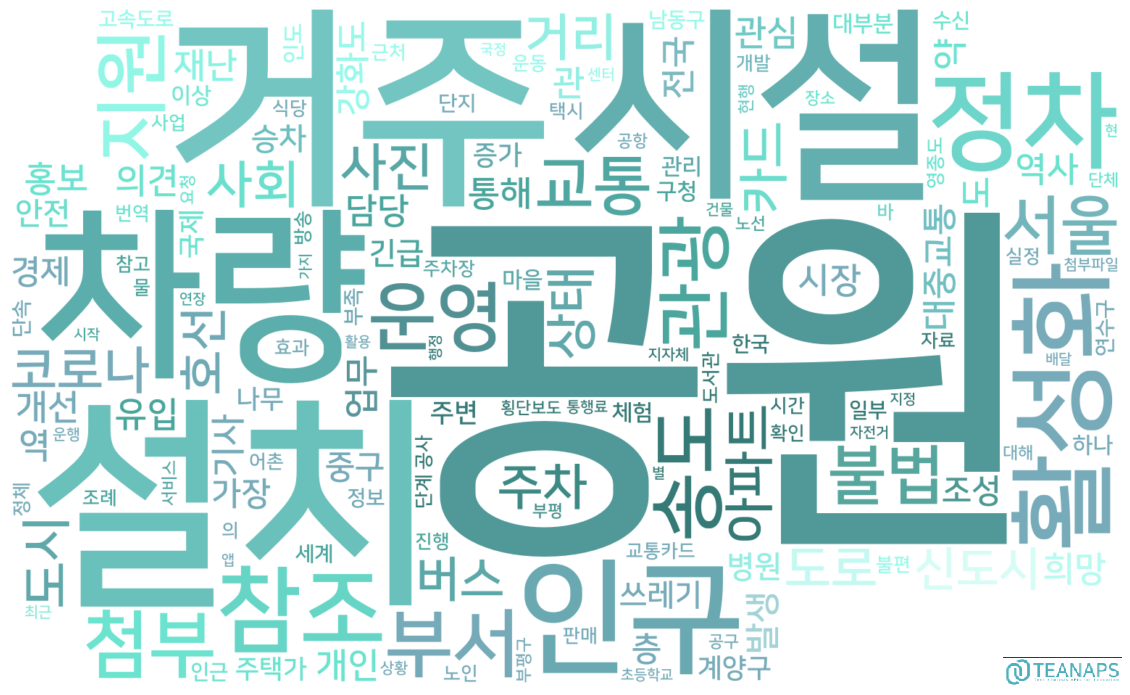

In [28]:
# TF-IDF 기준 워드클라우드를 출력합니다.
count_dict = tfidf.get_tfidf_dict()
tfidf.get_wordcloud(count_dict)

### 불용어, 동의어 처리하기

In [6]:
from teanaps.nlp import Processing

pro = Processing()

#전체 불용어 리스트 확인하기
result = pro.get_stopword()
print(result)

['안녕하십니까', '위', '개', '곳', '앞', '후', '또한', '류지', '때', '함', '비', '결과', '다른', '그', '해당', '것', '군', '현재', '제안', '부처', '및', '등', '사람', '인천시', '인천광역시', '현황', '시민', '시', '수', '인천', '모든', '지역', '처리', '제', '대한', '이용', '사용', '이', '내', '저', '중', '위해', '때문', '내', '온', '위해', '임', '생각', '주민', '경우', '알', '일', '은', '항', '로', '각', '민원', '수고', '음', '타고', '분', '글', '요', '전', '거', '무', '안', '인사', '진짜', '네', '오', '번', '엄마', '뭐', '좀', '아이', '모드', '많', '없', '같', '있', '그렇', '맘', '플', '차', '같아요', '아이모드', '있어요', '입니다', '해', '있는', '우리', '문제점', '문제', '린지', '중인', '를', '종국', '관련', '씨엘', '린지해당', '스마트']


In [7]:
# 불용어를 리스트 단위로 추가합니다.

pro.add_stopword(["중","그","알","일","은","항","후","로","각","민원","제","수고","음"])
result = pro.get_stopword()
print(result)

['안녕하십니까', '위', '개', '곳', '앞', '후', '또한', '류지', '때', '함', '비', '결과', '다른', '그', '해당', '것', '군', '현재', '제안', '부처', '및', '등', '사람', '인천시', '인천광역시', '현황', '시민', '시', '수', '인천', '모든', '지역', '처리', '제', '대한', '이용', '사용', '이', '내', '저', '중', '위해', '때문', '내', '온', '위해', '임', '생각', '주민', '경우', '알', '일', '은', '항', '로', '각', '민원', '수고', '음', '타고', '분', '글', '요', '전', '거', '무', '안', '인사', '진짜', '네', '오', '번', '엄마', '뭐', '좀', '아이', '모드', '많', '없', '같', '있', '그렇', '맘', '플', '차', '같아요', '아이모드', '있어요', '입니다', '해', '있는', '우리', '문제점', '문제', '린지', '중인', '를', '종국', '관련', '씨엘', '린지해당', '스마트']


In [8]:
# 동의어 처리
pro.add_synonym({'현황': ['현황','상태', '실정']})
result=pro.get_synonym()
print(result)

{'맨체스터 유나이티드': ['맨체스터 유나이티드', '맨유'], '아이폰': ['아이폰', 'iphone', '사과폰', '아이폰3s', '아이폰3', '아이폰6', '아이폰x'], '시민': ['시민', '주민', '사람'], '현재': ['현재', '현황'], '인천광역시': ['인천광역시', '인천시', '인천'], '현황': ['현황', '상태', '실정'], '아이모드': ['아이모드', '아이', '모드'], '영종하늘도시': ['영종하늘도시', '영종', '하늘', '도시'], '대중교통': ['대중교통', '교통'], '검단신도시': ['검단신도시', '검단', '신도시']}
